In [2]:
import pandas as pd
import numpy as np
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as pt

In [3]:
df=pd.read_csv("movies.csv")

In [4]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
#selecting the required features from the data frame
selected_items=['genres','keywords','tagline','cast','director']

In [6]:
for features in selected_items:
    df[features]=df[features].fillna('')

In [7]:
#combining all the 5 features
combined_features=df['genres']+' '+df['keywords']+' '+df['tagline']+' '+df['cast']+' '+df['director']

In [8]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [9]:
#now we convert the text into a numerical value
vectorizer=TfidfVectorizer()

In [10]:
feature_vectors=vectorizer.fit_transform(combined_features)

In [11]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [12]:
#getting cosine similarity
similarity=cosine_similarity(feature_vectors)

In [13]:
similarity

array([[1.        , 0.07219487, 0.037733  , ..., 0.        , 0.        ,
        0.        ],
       [0.07219487, 1.        , 0.03281499, ..., 0.03575545, 0.        ,
        0.        ],
       [0.037733  , 0.03281499, 1.        , ..., 0.        , 0.05389661,
        0.        ],
       ...,
       [0.        , 0.03575545, 0.        , ..., 1.        , 0.        ,
        0.02651502],
       [0.        , 0.        , 0.05389661, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02651502, 0.        ,
        1.        ]])

In [14]:
movie_name=input("Enter your favorite movie name")

Enter your favorite movie namepirates


In [15]:
#creating a list with all the movie names given in the data set
list_of_titles=df['title'].tolist()

In [16]:
print(list_of_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [17]:
#finding the close match for the movie name given by the user
find_close_match=difflib.get_close_matches(movie_name,list_of_titles)
print(find_close_match)

['Vampires', 'Kites']


In [18]:
close_match=find_close_match[0]
print(close_match)

Vampires


In [19]:
#finding the index of the movie with title
index_of_the_movie=df[df.title==close_match]['index'].values[0]
print(index_of_the_movie)

2169


In [20]:
#now using the index we do getting a list of similar movies
similarity_score=list(enumerate(similarity[index_of_the_movie]))

In [21]:
print(similarity_score)
#first one represents the index and the next one represents the similarity score

[(0, 0.051108510307202495), (1, 0.05623359948634572), (2, 0.07411992637774724), (3, 0.02183695066561036), (4, 0.06797700158986869), (5, 0.07518475062054393), (6, 0.031852047751850035), (7, 0.06289024057068866), (8, 0.05368617892901223), (9, 0.09292992781834924), (10, 0.039605095469344785), (11, 0.05454849863742971), (12, 0.01835223594965154), (13, 0.021418963802569017), (14, 0.04739065057423078), (15, 0.08190898082802603), (16, 0.05963331663606217), (17, 0.04519872492885434), (18, 0.02821358772324162), (19, 0.06239103169038952), (20, 0.038596912062615014), (21, 0.005032497958041304), (22, 0.05514882493297714), (23, 0.039651633885203916), (24, 0.053034567628777195), (25, 0.032046847000446396), (26, 0.006246856751158961), (27, 0.015010275807005688), (28, 0.01647951147794658), (29, 0.04865079570445954), (30, 0.06260575259415861), (31, 0.05750431058915154), (32, 0.06133836199567996), (33, 0.06493210004550863), (34, 0.0101600895053572), (35, 0.03338711352260518), (36, 0.005689675436556192),

In [22]:
#sorting the movies based on their similarity score
sorted_similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse=True)
print(sorted_similar_movies)


[(2169, 1.0000000000000002), (365, 0.17707139638540184), (1939, 0.16845624451395916), (2049, 0.16481884645016667), (768, 0.16286587538502909), (1349, 0.15800757196561996), (3501, 0.15120665941817327), (3858, 0.1376615395778413), (1944, 0.13755528718180246), (1230, 0.13712837493201666), (4250, 0.13690125646140883), (354, 0.1286690067281777), (3704, 0.1250035373175491), (330, 0.12062492672648813), (568, 0.11999131342823416), (3860, 0.11935472367097727), (2684, 0.11932594931363469), (2129, 0.11808032780963232), (1335, 0.11789687524466506), (3914, 0.11771232755431821), (1945, 0.11721675712138607), (759, 0.11717106923252102), (71, 0.11600812500096977), (844, 0.11492085749067728), (1540, 0.11297507404422898), (2572, 0.11282562791229114), (4024, 0.11274070442613164), (329, 0.11185566971403829), (632, 0.11124933897006586), (1914, 0.11071402633026432), (2503, 0.11069482317698978), (3284, 0.11061853681451936), (1977, 0.10796279494218795), (512, 0.10793808173157994), (4496, 0.10651414337910058), 

In [23]:
#printing the names of similar movies based on the index
print('movie recommendations:\n')
i=1
for movie in sorted_similar_movies:
    index=movie[0]
    title_from_index=df[df.index==index]['title'].values[0]
    if i<30:
        print(i,title_from_index)
        i+=1
        

movie recommendations:

1 Vampires
2 Contact
3 BloodRayne
4 Dudley Do-Right
5 Priest
6 Ghosts of Mississippi
7 Julia
8 Stranded
9 Me and Orson Welles
10 The Shadow
11 Wal-Mart: The High Cost of Low Price
12 The Girl with the Dragon Tattoo
13 Salvador
14 The Lord of the Rings: The Two Towers
15 xXx
16 High Anxiety
17 Vampire in Brooklyn
18 The Black Hole
19 How to Be Single
20 Judgment at Nuremberg
21 The Best Offer
22 The Relic
23 The Mummy: Tomb of the Dragon Emperor
24 The Hunted
25 American Pie 2
26 Boogie Nights
27 The Spectacular Now
28 The Lord of the Rings: The Return of the King
29 Dreamcatcher


In [24]:
plottingval=[]
for i in range(0,30):
    plottingval.append(sorted_similar_movies[i][1])
print(plottingval)

[1.0000000000000002, 0.17707139638540184, 0.16845624451395916, 0.16481884645016667, 0.16286587538502909, 0.15800757196561996, 0.15120665941817327, 0.1376615395778413, 0.13755528718180246, 0.13712837493201666, 0.13690125646140883, 0.1286690067281777, 0.1250035373175491, 0.12062492672648813, 0.11999131342823416, 0.11935472367097727, 0.11932594931363469, 0.11808032780963232, 0.11789687524466506, 0.11771232755431821, 0.11721675712138607, 0.11717106923252102, 0.11600812500096977, 0.11492085749067728, 0.11297507404422898, 0.11282562791229114, 0.11274070442613164, 0.11185566971403829, 0.11124933897006586, 0.11071402633026432]


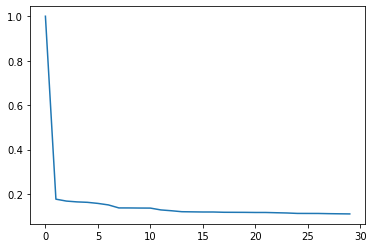

In [25]:

pt.plot(plottingval)